## I. Introduction

This week's assignment provides practice in using the pandas package for describing a dataset, using seaborn and matplotlib to visualize the data, and demonstrating our ability to answer questions about the dataset.

The following datasets were provided for this assignment: movies.dat, ratings.dat, users.dat. Additionally, a README.md was provided that acts as a dictionary for the datasets provided as well as the citation and acknowledgements in procuring these datasets.

## II. Methods/Code, III. Results/Output, IV. Analysis of Results

### Setup
---

In [1]:
# import pandas, seaborn, and matplotlib, plus setup graph visualization for jupyter notebooks

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!head assign_wk1/movies.dat

1;Toy Story (1995);Animation|Children's|Comedy
2;Jumanji (1995);Adventure|Children's|Fantasy
3;Grumpier Old Men (1995);Comedy|Romance
4;Waiting to Exhale (1995);Comedy|Drama
5;Father of the Bride Part II (1995);Comedy
6;Heat (1995);Action|Crime|Thriller
7;Sabrina (1995);Comedy|Romance
8;Tom and Huck (1995);Adventure|Children's
9;Sudden Death (1995);Action
10;GoldenEye (1995);Action|Adventure|Thriller


In [3]:
!head assign_wk1/ratings.dat

1;1193;5;978300760
1;661;3;978302109
1;914;3;978301968
1;3408;4;978300275
1;2355;5;978824291
1;1197;3;978302268
1;1287;5;978302039
1;2804;5;978300719
1;594;4;978302268
1;919;4;978301368


In [4]:
!head assign_wk1/users.dat

1;F;1;10;48067
2;M;56;16;70072
3;M;25;15;55117
4;M;45;7;02460
5;M;25;20;55455
6;F;50;9;55117
7;M;35;1;06810
8;M;25;12;11413
9;M;25;17;61614
10;F;35;1;95370


In [5]:
# movie.dat fields --> MovieID::Title::Genres

movies_cols = ['movie_id', 'title', 'genres']

# movies.dat when using the encoding below still has one error line due to a utf &#***; form character
# I chose to exclude this from the analysis for now
movies_df = pd.read_csv('assign_wk1/movies.dat', sep=';', names=movies_cols, encoding='ISO-8859-1', on_bad_lines='skip')
movies_df.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
# ratings.dat fields --> UserID::MovieID::Rating::Timestamp

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df = pd.read_csv('assign_wk1/ratings.dat', sep=';', names=ratings_cols)
ratings_df.head(10)

,user_id,movie_id,rating,unix_timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [7]:
# users.dat fields --> UserID::Gender::Age::Occupation::Zip-code

users_cols = ['user_id', 'sex', 'age', 'occupation', 'zip_code']
users_df = pd.read_csv('assign_wk1/users.dat', sep=';', names=users_cols)
users_df.head(10)

,user_id,sex,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [8]:
# merge ratings_df and movies_df
movies_ratings_merged = pd.merge(movies_df, ratings_df, on='movie_id')

# merge movies_ratings_merged and users_df
movies_ratings_users_merged = pd.merge(movies_ratings_merged, users_df, on='user_id')
movies_ratings_users_merged

,movie_id,title,genres,user_id,rating,unix_timestamp,sex,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000176,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000177,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000178,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000179,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


### Utility Methods & Classes
---

In [9]:
def get_movie(movie):
    return movies_df[movies_df['movie_id'] == movie]['title']

In [10]:
# MovieRating class initializes with a dataframe with the minimum columns of movie_id (int) and rating (float)

class MovieRating:
    def __init__(self, df):
        self.df = df

    # method returns the highest average rated movie(s) by taking the mean then selecting only
    # the records that match the max value for average rating 
    def highest_avg_rating_movies(self):
        avg_rating_df = self.df.groupby('movie_id').mean()
        top_avg_rating_df = avg_rating_df[avg_rating_df['rating'] == max(avg_rating_df['rating'])]
        top_avg_rating_df = pd.merge(top_avg_rating_df, movies_df, on='movie_id')
        return top_avg_rating_df[['title', 'rating', 'movie_id']]

    # method returns the lowest average rated movie(s) by taking the mean then selecting only
    # the records that match the max value for average rating 
    def lowest_avg_rating_movies(self):
        avg_rating_df = self.df.groupby('movie_id').mean()
        bottom_avg_rating_df = avg_rating_df[avg_rating_df['rating'] == min(avg_rating_df['rating'])]
        bottom_avg_rating_df = pd.merge(bottom_avg_rating_df, movies_df, on='movie_id')
        return bottom_avg_rating_df[['title', 'rating', 'movie_id']]
    
    # method returns the highest count of ratings movie(s) by taking the count then selecting only
    # the records that match the max value for count of ratings
    def most_rated_movie(self):
        rated_movie_count_df = self.df.groupby('movie_id').count()
        most_rated_movie_df = rated_movie_count_df[rated_movie_count_df['rating'] 
                                                   == max(rated_movie_count_df['rating'])]['rating']
        most_rated_movie_df = pd.merge(most_rated_movie_df, movies_df, on='movie_id')
        return most_rated_movie_df[['movie_id', 'title']]

In [11]:
# UserRating class initializes with a dataframe with the minimum columns of user_id (int) and rating (float)

class UserRating:
    def __init__(self, df):
        self.df = df
    
    # method returns a list of the top ten rating making user_id's by taking the count, sorting high to low and returning
    # the first ten records
    def top_ten_reviewing_users(self):
        users_count_df = self.df.groupby('user_id').count().sort_values(by='rating', ascending=False)
        return users_count_df['rating'].head(10)

### Question 1

---

- **Describe what both info and shape functions are used for.**

I will start this section by showing each functions output on our dataframe that we created in our methods section.

In [12]:
# info function result

movies_ratings_users_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000181 entries, 0 to 1000180
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   movie_id        1000181 non-null  int64 
 1   title           1000181 non-null  object
 2   genres          1000181 non-null  object
 3   user_id         1000181 non-null  int64 
 4   rating          1000181 non-null  int64 
 5   unix_timestamp  1000181 non-null  int64 
 6   sex             1000181 non-null  object
 7   age             1000181 non-null  int64 
 8   occupation      1000181 non-null  int64 
 9   zip_code        1000181 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [13]:
# shape function result

movies_ratings_users_merged.shape

(1000181, 10)

The methods info, and shape both return meta information about the dataframe.  We would call them to learn about the columns, number of rows and data types associated with a specific dataframe.

---

- **What information is returned from these functions?**

The info function returns meta information about the dataframe that we have just created.  In particular, the info method returns the count and range of entries, the number and name of each column, how many entries are non-null, the data type of the column, the aggregation of the types of columns and the memory usage of the dataframe.

The shape function returns the count of rows followed by the count of columns of the dataframe describing the shape of the dataframe we are analyzing.

---

- **Why is this information helpful?**

The info function provides the data we need for understanding which of our columns are classifications/labels and which are values.  It does not go as far as to tell us that the unix_timestamp is a datetime so naming and understanding our columns will require more than just running the info method.  The second helpful piece of information is the non-null count, which will highlight for us the number of rows that might need further preprocessing before starting our analysis.  I mean determining how to handle NA's and null values for the various columns, and if we want to keep them or exclude them from our analysis, and if we do keep them how/if we will fill them when we analyze the dataframe.

### Question 2

---

- **Which movie(s) has the highest average rating?**

In [14]:
ma = MovieRating(movies_ratings_users_merged)

ma.highest_avg_rating_movies()

,title,rating,movie_id
0,"Gate of Heavenly Peace, The (1995)",5.0,787
1,Schlafes Bruder (Brother of Sleep) (1995),5.0,989
2,Follow the Bitch (1998),5.0,1830
3,Ulysses (Ulisse) (1954),5.0,3172
4,Smashing Time (1967),5.0,3233
5,"Baby, The (1973)",5.0,3280
6,Song of Freedom (1936),5.0,3382
7,One Little Indian (1973),5.0,3607
8,Lured (1947),5.0,3656
9,Bittersweet Motel (2000),5.0,3881


- **What about the movie(s) with the lowest rating?**

In [15]:
ma.lowest_avg_rating_movies()

,title,rating,movie_id
0,"Silence of the Palace, The (Saimt el Qusur) (1...",1.0,127
1,Nueba Yol (1995),1.0,133
2,Shadows (Cienie) (1988),1.0,142
3,"Little Indian, Big City (Un indien dans la vil...",1.0,641
4,Mutters Courage (1995),1.0,655
5,Windows (1980),1.0,684
6,"Low Life, The (1994)",1.0,730
7,Diebinnen (1995),1.0,826
8,Lotto Land (1995),1.0,843
9,Venice/Venice (1992),1.0,895


- **Which movie(s) has the most ratings in our dataset**

In [16]:
ma.most_rated_movie()

,movie_id,title
0,2858,American Beauty (1999)


- **List the 10 users who have rated the most movies**

In [17]:
ua = UserRating(ratings_df)

ua.top_ten_reviewing_users()

user_id
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: rating, dtype: int64

### Question 3
---

**Define 5 questions you would like to investigated within this dataset**

---

- **What are the top love it or hate it movies with above average numbers of ratings?**

The first thing that I did for determining how to answer this question was to create a metric for determining how controversially rated a movie is.  The metric that I decided to use is inspired by the Net Promoter Score, and I determined that the most important feature of this kind of love it or hate it movie is the number of extreme answers (1 and 5).  Additionally, I wanted them to remain fairly balanced not just a straight summation.  A movie with a hundred five stars and a single one start should be much lower on my controversy metric than a movie with fifty and fifty.

$ Conv = (\min(Ratings_{5's}, Ratings_{1's}) / Ratings_{all}) * 100$

In [18]:
# This is a horribly inefficient way of doing this, O(n^2)
new_df = movies_ratings_users_merged
cols = ['movie_id', 'five_ratings', 'one_ratings', 'total_ratings', 'rating_metric']
result_df = pd.DataFrame(columns=cols)
result_df.index.name = 'movie_id'

def counts(df, movie_id):
    fives_df = df.loc[(df['rating'] == 5) & (df['movie_id'] == movie_id)]
    fives = fives_df.count()['movie_id']
    
    ones_df = df.loc[(df['rating'] == 1) & (df['movie_id'] == movie_id)]
    ones = ones_df.count()['movie_id']
    
    total = df[df['movie_id'] == movie_id].count()['movie_id']
    
    metric = min([fives, ones])/total*100
    
    return [movie_id, fives, ones, total, metric]

for movie in new_df['movie_id'].unique():
    result_arr = counts(new_df, movie)
    result_df.loc[result_arr[0]] = result_arr

In [19]:
copy_results = result_df.copy()
copy_results = copy_results[copy_results['total_ratings'] >= 270]
copy_results = pd.merge(copy_results, movies_df, on='movie_id')
copy_results.sort_values('rating_metric', ascending=False).head(6)


,movie_id,five_ratings,one_ratings,total_ratings,rating_metric,title,genres
760,231.0,126.0,105.0,660.0,15.909091,Dumb & Dumber (1994),Comedy
113,288.0,119.0,110.0,700.0,15.714286,Natural Born Killers (1994),Action|Thriller
646,2710.0,180.0,219.0,1237.0,14.551334,"Blair Witch Project, The (1999)",Horror
424,2431.0,64.0,62.0,474.0,13.080169,Patch Adams (1998),Comedy|Drama
1041,2861.0,43.0,48.0,354.0,12.146893,For Love of the Game (1999),Comedy|Drama
373,1676.0,152.0,139.0,1163.0,11.951849,Starship Troopers (1997),Action|Adventure|Sci-Fi|War


Using the metric that we created as our way of organizing movies and determining our Love it / Hate it score we found that the movie with above average total number of ratings with the highest score on our metric was Dumb & Dumber from 1994.

- **What does the distribution of a love it or hate it movie look like?**

<AxesSubplot:title={'center':'Starship Troopers (1997)'}, xlabel='Value', ylabel='Count'>

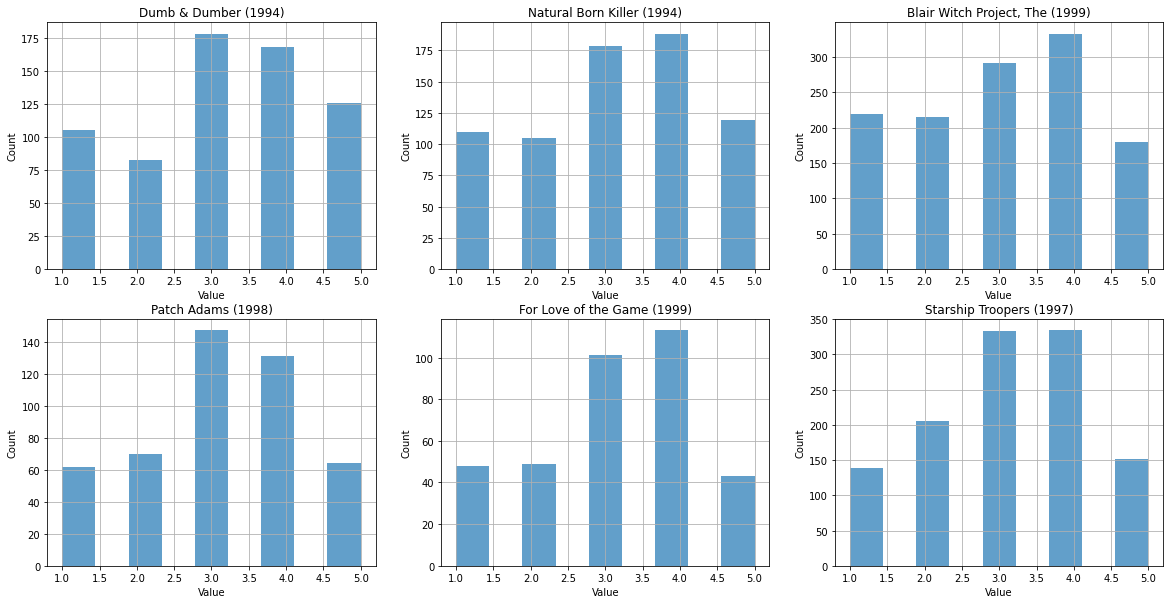

In [20]:
fig1 = plt.figure(figsize=(20, 10))

# Subplots
## Dumb & Dumber (1994)
ax1 = fig1.add_subplot(231)
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')
ax1.set_title('Dumb & Dumber (1994)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 231]['rating'].hist(alpha=0.7, bins=9)

## Natural Born Killer (1994)
ax2 = fig1.add_subplot(232)
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')
ax2.set_title('Natural Born Killer (1994)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 288]['rating'].hist(alpha=0.7, bins=9)

## Blair Witch Project, The (1999)
ax3 = fig1.add_subplot(233)
ax3.set_xlabel('Value')
ax3.set_ylabel('Count')
ax3.set_title('Blair Witch Project, The (1999)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 2710]['rating'].hist(alpha=0.7, bins=9)

## Patch Adams (1998)
ax4 = fig1.add_subplot(234)
ax4.set_xlabel('Value')
ax4.set_ylabel('Count')
ax4.set_title('Patch Adams (1998)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 2431]['rating'].hist(alpha=0.7, bins=9)

## For Love of the Game (1999)
ax5 = fig1.add_subplot(235)
ax5.set_xlabel('Value')
ax5.set_ylabel('Count')
ax5.set_title('For Love of the Game (1999)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 2861]['rating'].hist(alpha=0.7, bins=9)

## Starship Troopers (1997)
ax6 = fig1.add_subplot(236)
ax6.set_xlabel('Value')
ax6.set_ylabel('Count')
ax6.set_title('Starship Troopers (1997)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 1676]['rating'].hist(alpha=0.7, bins=9)

It appears that our love it or hate it movies tend to still keep a relatively normal distribution when assessing visually.

- **What would be different in the distribution if we lowered the threshold for total number of ratings?**

In [21]:
copy_results = result_df.copy()
copy_results = copy_results[copy_results['total_ratings'] >= 25]
copy_results = pd.merge(copy_results, movies_df, on='movie_id')
copy_results.sort_values('rating_metric', ascending=False).head(6)

,movie_id,five_ratings,one_ratings,total_ratings,rating_metric,title,genres
2486,2483.0,7.0,8.0,25.0,28.000000,"Day of the Beast, The (El Día de la bestia) (1...",Comedy|Horror|Thriller
2382,3913.0,7.0,10.0,32.0,21.875000,Barenaked in America (1999),Documentary
2913,3847.0,5.0,6.0,25.0,20.000000,"Ilsa, She Wolf of the SS (1974)",Horror
2611,1241.0,19.0,13.0,70.0,18.571429,Braindead (1992),Comedy|Horror
194,2314.0,19.0,19.0,104.0,18.269231,Beloved (1998),Drama
963,38.0,5.0,7.0,28.0,17.857143,It Takes Two (1995),Comedy


<AxesSubplot:title={'center':'It Takes Two (1995)'}, xlabel='Value', ylabel='Count'>

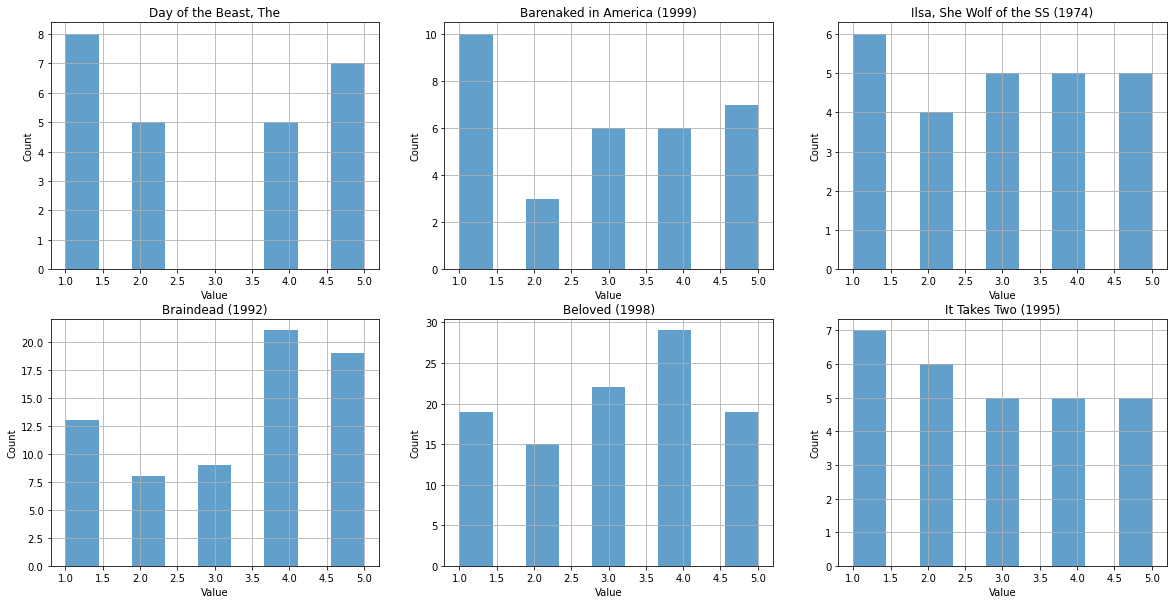

In [22]:
fig1 = plt.figure(figsize=(20, 10))

# Subplots
## Day of the Beast, The
ax1 = fig1.add_subplot(231)
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')
ax1.set_title('Day of the Beast, The')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 2483]['rating'].hist(alpha=0.7, bins=9)

## Barenaked in America (1999)
ax2 = fig1.add_subplot(232)
ax2.set_xlabel('Value')
ax2.set_ylabel('Count')
ax2.set_title('Barenaked in America (1999)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 3913]['rating'].hist(alpha=0.7, bins=9)

## Ilsa, She Wolf of the SS (1974)
ax3 = fig1.add_subplot(233)
ax3.set_xlabel('Value')
ax3.set_ylabel('Count')
ax3.set_title('Ilsa, She Wolf of the SS (1974)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 3847]['rating'].hist(alpha=0.7, bins=9)

## Braindead (1992)
ax4 = fig1.add_subplot(234)
ax4.set_xlabel('Value')
ax4.set_ylabel('Count')
ax4.set_title('Braindead (1992)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 1241]['rating'].hist(alpha=0.7, bins=9)

## Beloved (1998)
ax5 = fig1.add_subplot(235)
ax5.set_xlabel('Value')
ax5.set_ylabel('Count')
ax5.set_title('Beloved (1998)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 2314]['rating'].hist(alpha=0.7, bins=9)

## It Takes Two (1995)
ax6 = fig1.add_subplot(236)
ax6.set_xlabel('Value')
ax6.set_ylabel('Count')
ax6.set_title('It Takes Two (1995)')
movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == 38]['rating'].hist(alpha=0.7, bins=9)

The distributions of our lower rating count love it or hate it movies follow distributions that were closer to my expectation when making the metric for rating.  We now have less ratings in the 2-4 range than our high rating count comparision, and some bifircate the top and bottom ratings really well. The best example would be Day of the Beast, which does not have any 3 ratings. This is the kind of movie that I was looking for when I first thought about this question.

- **What is the lowest average rated movie with more than the bottom quartile number of ratings?**

In [23]:
# Using the describe function to see what my bottom quartile cutoff is for number of ratings
low_avg_df = movies_ratings_users_merged.copy()
result_df.describe()

,movie_id,five_ratings,one_ratings,total_ratings,rating_metric
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000
mean,1995.073954,61.081511,15.161404,269.954386,3.740049
std,1150.902213,147.531006,22.692918,384.079107,4.007945
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,989.000000,2.000000,2.000000,33.000000,0.881057
50%,2033.000000,11.000000,6.000000,124.000000,2.777778
75%,2990.000000,50.000000,19.000000,350.000000,5.397727
max,3952.000000,1963.000000,314.000000,3428.000000,50.000000


After looking at the results from the describe method it looks like the number of ratings that we need is 33, so that threshold value and above should be our cutoff for this analysis.

In [24]:
def count_of_ratings(movie_id):
    return movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == movie_id].count()['movie_id']

def sum_of_ratings(movie_id):
    return movies_ratings_users_merged[movies_ratings_users_merged['movie_id'] == movie_id].sum()['rating']

trimmed_movies_df = movies_df.copy()
trimmed_movies_df['ratings_count'] = trimmed_movies_df.apply([lambda x: count_of_ratings(x.movie_id)], axis=1)
trimmed_movies_df['ratings_sum'] = trimmed_movies_df.apply([lambda x: sum_of_ratings(x.movie_id)], axis=1)
trimmed_movies_df['ratings_avg'] = trimmed_movies_df.apply([lambda x: x.ratings_sum / (x.ratings_count or 1)], axis=1)
trimmed_movies_df = trimmed_movies_df[trimmed_movies_df['ratings_count'] >= 33]

In [25]:
trimmed_movies_df.sort_values('ratings_avg')

,movie_id,title,genres,ratings_count,ratings_sum,ratings_avg
1463,1495,Turbo: A Power Rangers Movie (1997),Action|Adventure|Children's,44,58.0,1.318182
1688,1739,3 Ninjas: High Noon On Mega Mountain (1998),Action|Children's,47,64.0,1.361702
1303,1323,Amityville 3-D (1983),Horror,43,59.0,1.372093
800,810,Kazaam (1996),Children's|Comedy|Fantasy,120,176.0,1.466667
3874,3945,Digimon: The Movie (2000),Adventure|Animation|Children's,43,64.0,1.488372
...,...,...,...,...,...,...
735,745,"Close Shave, A (1995)",Animation|Comedy|Thriller,657,2970.0,4.520548
847,858,"Godfather, The (1972)",Action|Crime|Drama,2223,10059.0,4.524966
315,318,"Shawshank Redemption, The (1994)",Drama,2227,10143.0,4.554558
1950,2019,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama,628,2864.0,4.560510


Once we have setup all of our calcuations and sorted our dataframe, it looks like Turbo: A Power Rangers Movie (1997) is our lowest average rated movie with a total number of ratings above the first quartile.  Looking further down the list to our fifth lowest I was Digimon: The Movie which I remember fondly from my childhood and have to wonder if there is some bias in our raters for kids movies since 4 of the bottom 5 are aimed at kids.

- **What male user gives the lowest average rating and rates more than 75% of other users?**

In [29]:
# Using the describe function to see what my bottom quartile cutoff is for number of ratings
def count_of_user_ratings(user_id):
    return movies_ratings_users_merged[movies_ratings_users_merged['user_id'] == user_id].count()['user_id']

def sum_of_user_ratings(user_id):
    return movies_ratings_users_merged[movies_ratings_users_merged['user_id'] == user_id].sum()['rating']

trimmed_users_df = users_df.copy()
trimmed_users_df['ratings_count'] = trimmed_users_df.apply([lambda x: count_of_user_ratings(x.user_id)], axis=1)
trimmed_users_df['ratings_sum'] = trimmed_users_df.apply([lambda x: sum_of_user_ratings(x.user_id)], axis=1)
trimmed_users_df['ratings_avg'] = trimmed_users_df.apply([lambda x: x.ratings_sum / (x.ratings_count or 1)], axis=1)
trimmed_users_df.describe()

,user_id,age,occupation,ratings_count,ratings_sum,ratings_avg
count,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854,165.592881,593.082450,3.702722
std,1743.742145,12.895962,6.329511,192.743070,661.300256,0.429630
min,1.000000,1.000000,0.000000,20.000000,50.000000,1.015385
25%,1510.750000,25.000000,3.000000,44.000000,164.000000,3.444444
50%,3020.500000,25.000000,7.000000,96.000000,350.000000,3.735510
75%,4530.250000,35.000000,14.000000,208.000000,759.000000,4.000000
max,6040.000000,56.000000,20.000000,2314.000000,8219.000000,4.962963


With our setup complete, it looks like our breakpoint for number of ratings for the top 25% is 208, so we will use that and our gender value to answer this question.

In [40]:
trimmed_users_df = trimmed_users_df[trimmed_users_df['ratings_count'] >= 208]
trimmed_users_df[trimmed_users_df['sex'] == 'M'].sort_values('ratings_avg')

,user_id,sex,age,occupation,zip_code,ratings_count,ratings_sum,ratings_avg
5685,5686,M,56,16,60610,530,1084,2.045283
3208,3209,M,25,0,21555,230,474,2.060870
1339,1340,M,25,7,14302,805,1741,2.162733
162,163,M,18,4,85013,514,1122,2.182879
1099,1100,M,25,0,60090,508,1117,2.198819
...,...,...,...,...,...,...,...,...
3687,3688,M,18,6,21202,304,1355,4.457237
160,161,M,45,16,98107-2117,297,1328,4.471380
2690,2691,M,18,4,06459,241,1082,4.489627
450,451,M,56,13,54720,209,943,4.511962


It looks like user 5686, a 56+ year old self-employed man in Chicago, IL is our lowest (frequent) movie rater with an average rating of 2.045. Just in the time it took me to read the README to determine the categories for occupation, and Google where the zip code was made me a little uncomfortable. I know that demographic data can be sensitive, and that this is relatively benign but it was enough that I did not want to dig in any deeper on the user dataframe.

## V. Conclusion

The questions that we answered in sections II - IV illustrate the richness of the dataset that we are working with.  The movielens data provided an excellent starting point for us to practice our pandas skills, manipulating multiple dataframes, and answering questions that required elements from different dataframes in order to answer. I took this assignment as an opportunity to organize my code in a few different ways, first with classes, then with functions, and also with ad-hoc one liners more akin to a script. To me, this demonstrated the need for a consistent style when producing these analyses as readability appeared to suffer when jumping from style to style.  I have not settled on a preferred method yet, but this definitely helped me see the need for developing one.

I chose to take this analysis in a direction that focused on what I have been calling love it or hate it movies. The metric that I created for this purpose was just a first attempt inspired by previous work with the Net Promoter Score, and I would be interested in continuing down this path to see if I can create a better metric for determining this. However, I am very pleased with the results from just putting a metric together as the list that it generated matched what I would think of when I think of love it or hate it movies.